In [39]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
Psy = pd.read_csv('data/Youtube01-Psy.csv')
Katy = pd.read_csv('data/Youtube02-KatyPerry.csv')
Eminem = pd.read_csv('data/Youtube04-Eminem.csv')
Shakira = pd.read_csv('data/Youtube05-Shakira.csv')
LMFAO = pd.read_csv('data/Youtube03-LMFAO.csv')

In [3]:
df = pd.concat([Shakira, Eminem, Katy, Psy, LMFAO])
df.drop('DATE', axis=1, inplace=True)

df.shape

(1956, 4)

In [4]:
df.head()

COMMENT_ID                              AUTHOR  \
0    z13lgffb5w3ddx1ul22qy1wxspy5cpkz504                          dharma pal   
1      z123dbgb0mqjfxbtz22ucjc5jvzcv3ykj                       Tiza Arellano   
2  z12quxxp2vutflkxv04cihggzt2azl34pms0k  Prìñçeśś Âliś Łøvê Dømíñø Mâđiś™ ﻿   
3      z12icv3ysqvlwth2c23eddlykyqut5z1h                       Eric Gonzalez   
4      z133stly3kete3tly22petvwdpmghrlli                       Analena López   

                                             CONTENT  CLASS  
0                                         Nice song﻿      0  
1                                      I love song ﻿      0  
2                                      I love song ﻿      0  
3  860,000,000 lets make it first female to reach...      0  
4                      shakira is best for worldcup﻿      0

<AxesSubplot:>

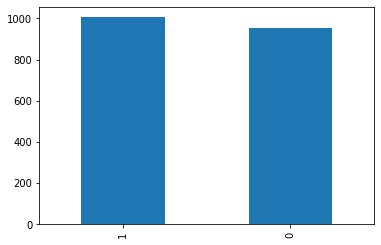

In [5]:
df['CLASS'].value_counts().plot(kind='bar')

In [6]:
classes = df['CLASS']
print(classes.value_counts())

1    1005
0     951
Name: CLASS, dtype: int64


In [88]:
text_messages = df["CONTENT"]

In [89]:
# Replace email addresses with 'email'
text_messages = text_messages.str.replace(r'^.+@[^\.].*\.[a-z]{2,}$', '<emailaddress>')

# Replace URLs with 'webaddress'
text_messages = text_messages.str.replace(r'^http\://[a-zA-Z0-9\-\.]+\.[a-zA-Z]{2,3}(/\S*)?$', '<webaddress>')

# Replace 10 digit phone numbers (formats include paranthesis, spaces, no spaces, dashes) with 'phonenumber'
text_messages = text_messages.str.replace(r'^\(?[\d]{3}\)?[\s-]?[\d]{3}[\s-]?[\d]{4}$', '<phonenumber>')

# Replace numbers with 'number'
text_messages = text_messages.str.replace(r'\d+([\.,]\d+)?', '<number>')

# Only letters digits and space signs
text_messages = text_messages.str.replace(r'[^\w\d\s]', ' ')

# Replace whitespace between terms with a single space
text_messages = text_messages.str.replace(r'\s+', ' ')
text_messages = text_messages.str.replace(r'\s+', ' ')

# Remove leading and trailing whitespace
text_messages = text_messages.str.replace(r'^\s+|\s+?$', '')
text_messages = text_messages.str.replace(r'^\s+|\s+?$', '')

In [90]:
# change words to lower case - Hello, HELLO, hello are all the same word
processed = text_messages.str.lower()

In [10]:
import nltk

In [91]:
from nltk.corpus import stopwords

# remove stop words from text messages

stop_words = set(stopwords.words('english'))

processed = processed.apply(lambda x: ' '.join(
    term for term in x.split() if term not in stop_words))

In [92]:
# Remove word stems using a Porter stemmer
ps = nltk.PorterStemmer()

processed = processed.apply(lambda x: ' '.join(
    ps.stem(term) for term in x.split()))

In [98]:
from sklearn.preprocessing import StandardScaler
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn import model_selection

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

In [136]:
from itertools import product

In [118]:
X = processed.copy()
y = classes.values.copy()

X_train_raw, X_test_raw, y_train, y_test = model_selection.train_test_split(X, y, test_size = 0.25, random_state=1)

In [139]:
results = {}
models = {}

for n, ngram_range in product(
    [10, 20, 50, 100, 200, 300, 400, 600, 800, 1000, 1200, 1500, 2000, 2500, 3000, 4000, 5000, 7000, 10000],
    [(1, 1), (1, 2), (2, 2), (1, 3), (2, 3), (3, 3)]
):
    print(n, ngram_range)

    vectorizer = CountVectorizer(max_features=n, ngram_range=ngram_range)
    X_train = vectorizer.fit_transform(X_train_raw).toarray()
    X_test = vectorizer.transform(X_test_raw).toarray()

    names = ["K Nearest Neighbors", "Decision Tree", "Random Forest", "Logistic Regression", "SGD Classifier",
             "Naive Bayes", "SVM Linear", 'SVM RBF', "AdaBoostClassifier"]

    classifiers = [
        KNeighborsClassifier(),
        DecisionTreeClassifier(),
        RandomForestClassifier(),
        LogisticRegression(),
        SGDClassifier(max_iter=100),
        MultinomialNB(),
        SVC(kernel='linear'),
        SVC(kernel='rbf'),
        AdaBoostClassifier()
    ]

    for name, model in zip(names, classifiers):
        model.fit(X_train, y_train)
        accuracy = (model.predict(X_test) == y_test).mean()*100
        results[(n, name, ngram_range)] = accuracy
        models[(n, name, ngram_range)] = model

    tfidf_t = TfidfTransformer()
    X_train_tfidf = tfidf_t.fit_transform(X_train)
    X_test_tfidf = tfidf_t.transform(X_test)


    names = ["K Nearest Neighbors", "Decision Tree", "Random Forest", "Logistic Regression", "SGD Classifier",
             "Naive Bayes", "SVM Linear", 'SVM RBF', "AdaBoostClassifier"]

    classifiers = [
        KNeighborsClassifier(),
        DecisionTreeClassifier(),
        RandomForestClassifier(),
        LogisticRegression(),
        SGDClassifier(max_iter=100),
        MultinomialNB(),
        SVC(kernel='linear'),
        SVC(kernel='rbf'),
        AdaBoostClassifier()
    ]

    for name, model in zip(names, classifiers):
        model.fit(X_train_tfidf, y_train)
        accuracy = (model.predict(X_test_tfidf) == y_test).mean()*100
        results[(n, name + ' (tf-idf)', ngram_range)] = accuracy
        models[(n, name + ' (tf-idf)', ngram_range)] = model

10 (1, 1)
10 (1, 2)
10 (2, 2)
10 (1, 3)
10 (2, 3)
10 (3, 3)
20 (1, 1)
20 (1, 2)
20 (2, 2)
20 (1, 3)
20 (2, 3)
20 (3, 3)
50 (1, 1)
50 (1, 2)
50 (2, 2)
50 (1, 3)
50 (2, 3)
50 (3, 3)
100 (1, 1)
100 (1, 2)
100 (2, 2)
100 (1, 3)
100 (2, 3)
100 (3, 3)
200 (1, 1)
200 (1, 2)
200 (2, 2)
200 (1, 3)
200 (2, 3)
200 (3, 3)
300 (1, 1)
300 (1, 2)
300 (2, 2)
300 (1, 3)
300 (2, 3)
300 (3, 3)
400 (1, 1)
400 (1, 2)
400 (2, 2)
400 (1, 3)
400 (2, 3)
400 (3, 3)
600 (1, 1)
600 (1, 2)
600 (2, 2)
600 (1, 3)
600 (2, 3)
600 (3, 3)
800 (1, 1)
800 (1, 2)
800 (2, 2)
800 (1, 3)
800 (2, 3)
800 (3, 3)
1000 (1, 1)
1000 (1, 2)
1000 (2, 2)
1000 (1, 3)
1000 (2, 3)
1000 (3, 3)
1200 (1, 1)
1200 (1, 2)
1200 (2, 2)
1200 (1, 3)
1200 (2, 3)
1200 (3, 3)
1500 (1, 1)
1500 (1, 2)
1500 (2, 2)
1500 (1, 3)
1500 (2, 3)
1500 (3, 3)
2000 (1, 1)
2000 (1, 2)
2000 (2, 2)
2000 (1, 3)
2000 (2, 3)
2000 (3, 3)
2500 (1, 1)
2500 (1, 2)
2500 (2, 2)
2500 (1, 3)
2500 (2, 3)
2500 (3, 3)
3000 (1, 1)
3000 (1, 2)
3000 (2, 2)
3000 (1, 3)
3000 (2, 3)
3000

In [140]:
sorted(results.items(), key=lambda x: -x[1])[:20]

[((1200, 'Random Forest', (1, 3)), 97.95501022494888),
 ((5000, 'Decision Tree', (1, 2)), 97.95501022494888),
 ((600, 'Random Forest', (1, 3)), 97.75051124744377),
 ((800, 'Decision Tree', (1, 2)), 97.75051124744377),
 ((1000, 'Random Forest', (1, 3)), 97.75051124744377),
 ((1000, 'Random Forest (tf-idf)', (1, 3)), 97.75051124744377),
 ((1200, 'Random Forest', (1, 2)), 97.75051124744377),
 ((3000, 'Random Forest', (1, 2)), 97.75051124744377),
 ((4000, 'Random Forest', (1, 1)), 97.75051124744377),
 ((5000, 'Decision Tree (tf-idf)', (1, 2)), 97.75051124744377),
 ((7000, 'Decision Tree', (1, 3)), 97.75051124744377),
 ((7000, 'Random Forest', (1, 3)), 97.75051124744377),
 ((10000, 'Decision Tree', (1, 3)), 97.75051124744377),
 ((10000, 'Decision Tree (tf-idf)', (1, 3)), 97.75051124744377),
 ((300, 'Random Forest', (1, 3)), 97.54601226993866),
 ((400, 'Decision Tree', (1, 2)), 97.54601226993866),
 ((800, 'Random Forest', (1, 2)), 97.54601226993866),
 ((800, 'Random Forest (tf-idf)', (1, 2))

Let's add length of the comment.

In [141]:
results = {}
models = {}


for n, ngram_range in product(
    [10, 20, 50, 100, 200, 300, 400, 600, 800, 1000, 1200, 1500, 2000, 2500, 3000, 4000, 5000, 7000, 10000],
    [(1, 1), (1, 2), (2, 2), (1, 3), (2, 3), (3, 3)]
):
    print(n, ngram_range)

    scaler = StandardScaler(with_mean=False)
    X_train_len = scaler.fit_transform(X_train_raw.str.len().values.reshape(-1, 1))
    X_test_len = scaler.transform(X_test_raw.str.len().values.reshape(-1, 1))

    vectorizer = CountVectorizer(max_features=n, ngram_range=ngram_range)
    X_train = vectorizer.fit_transform(X_train_raw).toarray()
    X_test = vectorizer.transform(X_test_raw).toarray()

    X_train_c = np.concatenate((X_train, X_train_len), axis=1)
    X_test_c = np.concatenate((X_test, X_test_len), axis=1)

    np.random.seed = 1

    names = ["K Nearest Neighbors", "Decision Tree", "Random Forest", "Logistic Regression", "SGD Classifier",
             "Naive Bayes", "SVM Linear", 'SVM RBF', "AdaBoostClassifier"]

    classifiers = [
        KNeighborsClassifier(),
        DecisionTreeClassifier(),
        RandomForestClassifier(),
        LogisticRegression(),
        SGDClassifier(max_iter = 100),
        MultinomialNB(),
        SVC(kernel = 'linear'),
        SVC(kernel = 'rbf'),
        AdaBoostClassifier()
    ]

    for name, model in zip(names, classifiers):
        model.fit(X_train_c, y_train)
        accuracy = (model.predict(X_test_c) == y_test).mean()*100
        results[(n, name, ngram_range)] = accuracy
        models[(n, name, ngram_range)] = model

        
    tfidf_t = TfidfTransformer()
    X_train_tfidf = tfidf_t.fit_transform(X_train).toarray()
    X_test_tfidf = tfidf_t.transform(X_test).toarray()

    X_train_tfidf_c = np.concatenate((X_train_tfidf, X_train_len), axis=1)
    X_test_tfidf_c = np.concatenate((X_test_tfidf, X_test_len), axis=1)


    names = ["K Nearest Neighbors", "Decision Tree", "Random Forest", "Logistic Regression", "SGD Classifier",
             "Naive Bayes", "SVM Linear", 'SVM RBF', "AdaBoostClassifier"]

    classifiers = [
        KNeighborsClassifier(),
        DecisionTreeClassifier(),
        RandomForestClassifier(),
        LogisticRegression(),
        SGDClassifier(max_iter = 100),
        MultinomialNB(),
        SVC(kernel = 'linear'),
        SVC(kernel = 'rbf'),
        AdaBoostClassifier()
    ]

    for name, model in zip(names, classifiers):
        model.fit(X_train_tfidf_c, y_train)
        accuracy = (model.predict(X_test_tfidf_c) == y_test).mean()*100
        results[(n, name + ' (tf-idf)', ngram_range)] = accuracy
        models[(n, name + ' (tf-idf)', ngram_range)] = model

10 (1, 1)
10 (1, 2)
10 (2, 2)
10 (1, 3)
10 (2, 3)
10 (3, 3)
20 (1, 1)
20 (1, 2)
20 (2, 2)
20 (1, 3)
20 (2, 3)
20 (3, 3)
50 (1, 1)
50 (1, 2)
50 (2, 2)
50 (1, 3)
50 (2, 3)
50 (3, 3)
100 (1, 1)
100 (1, 2)
100 (2, 2)
100 (1, 3)
100 (2, 3)
100 (3, 3)
200 (1, 1)
200 (1, 2)
200 (2, 2)
200 (1, 3)
200 (2, 3)
200 (3, 3)
300 (1, 1)
300 (1, 2)
300 (2, 2)
300 (1, 3)
300 (2, 3)
300 (3, 3)
400 (1, 1)
400 (1, 2)
400 (2, 2)
400 (1, 3)
400 (2, 3)
400 (3, 3)
600 (1, 1)
600 (1, 2)
600 (2, 2)
600 (1, 3)
600 (2, 3)
600 (3, 3)
800 (1, 1)
800 (1, 2)
800 (2, 2)
800 (1, 3)
800 (2, 3)
800 (3, 3)
1000 (1, 1)
1000 (1, 2)
1000 (2, 2)
1000 (1, 3)
1000 (2, 3)
1000 (3, 3)
1200 (1, 1)
1200 (1, 2)
1200 (2, 2)
1200 (1, 3)
1200 (2, 3)
1200 (3, 3)
1500 (1, 1)
1500 (1, 2)
1500 (2, 2)
1500 (1, 3)
1500 (2, 3)
1500 (3, 3)
2000 (1, 1)
2000 (1, 2)
2000 (2, 2)
2000 (1, 3)
2000 (2, 3)
2000 (3, 3)
2500 (1, 1)
2500 (1, 2)
2500 (2, 2)
2500 (1, 3)
2500 (2, 3)
2500 (3, 3)
3000 (1, 1)
3000 (1, 2)
3000 (2, 2)
3000 (1, 3)
3000 (2, 3)
3000

In [142]:
sorted(results.items(), key=lambda x: -x[1])[:20]

[((5000, 'SGD Classifier (tf-idf)', (1, 3)), 97.95501022494888),
 ((7000, 'Random Forest', (1, 1)), 97.54601226993866),
 ((600, 'Logistic Regression', (1, 2)), 97.34151329243353),
 ((600, 'Logistic Regression', (1, 3)), 97.34151329243353),
 ((600, 'AdaBoostClassifier (tf-idf)', (1, 3)), 97.34151329243353),
 ((800, 'AdaBoostClassifier (tf-idf)', (1, 2)), 97.34151329243353),
 ((1000, 'AdaBoostClassifier (tf-idf)', (1, 3)), 97.34151329243353),
 ((1200, 'AdaBoostClassifier (tf-idf)', (1, 2)), 97.34151329243353),
 ((2000, 'Logistic Regression', (1, 2)), 97.34151329243353),
 ((3000, 'Random Forest', (1, 1)), 97.34151329243353),
 ((5000, 'Random Forest', (1, 1)), 97.34151329243353),
 ((10000, 'Random Forest', (1, 1)), 97.34151329243353),
 ((10000, 'Random Forest (tf-idf)', (1, 2)), 97.34151329243353),
 ((300, 'Logistic Regression', (1, 3)), 97.13701431492842),
 ((300, 'AdaBoostClassifier', (1, 3)), 97.13701431492842),
 ((300, 'Random Forest (tf-idf)', (1, 3)), 97.13701431492842),
 ((400, 'Log

The optimal model is Random Forest with vocabulary of size 1200.

In [143]:
vectorizer = CountVectorizer(max_features=1200, ngram_range=(1, 3))
X = vectorizer.fit_transform(processed).toarray()
y = classes.values.copy()

model = RandomForestClassifier()
model.fit(X, y)

RandomForestClassifier()

In [144]:
from joblib import dump
dump(vectorizer, 'vectorizer.joblib')
dump(model, 'model.joblib')

['model.joblib']